In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as plticker

In [3]:
def plot_latency(x_vals, y_vals, labels, title, colors, filename):
    assert len(x_vals) == len(y_vals), "Number of x and y values must be the same"
    assert len(colors) >= len(x_vals), f"Number of colors must not less than {len(x_vals)}: colors:{len(colors)}"
    
    # create plot
    fig, ax = plt.subplots()

    # plot x-axis tick every 64 ticks, dont plot 0 tick
    x_ticks = np.arange(0, len(x_vals[0]) + 1, 64)
    x_ticks[0] = 1
    plt.xticks(x_ticks)

    # make dot smaller
    plt.rcParams['lines.markersize'] = 5

    # make font larger
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
        ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(14)
        
    # plot vertical line at every 64 tokens
    for i in range(0, len(x_vals[0]) + 1, 32):
        if i == 0:
            x = 1
        else:
            x = i
        plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.5)
        
    # plot x-axis: number of tokens, y-axis: latency
    for i, l in enumerate(x_vals):
        plt.plot(range(1, len(l) + 1), l, marker='o', label=y_vals[i], color=colors[i])
        # latency_ratio = l/[l[0]]
        # plt.plot(range(1, len(l) + 1), latency_ratio, marker='o', label=labels[i], color=colors[i])
    
    # 3.12312435 -> 3.12x
    # ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}x'))
    
    # show legend
    ax.legend()
    
    # make more yticks
    gap = round((x_vals[-1][-1]-x_vals[0][0])*2)/20
    ax.yaxis.set_major_locator(plticker.MultipleLocator(base=gap))

    # set x-axis label
    plt.xlabel('Decode Tokens', fontsize=14)

    # set y-axis label
    plt.ylabel('Latency Ratio', fontsize=14)

    # set title
    plt.title(title, fontsize=14)
    
        # make plot tight
    plt.tight_layout()

    # save plot
    plt.savefig(filename, dpi=300)

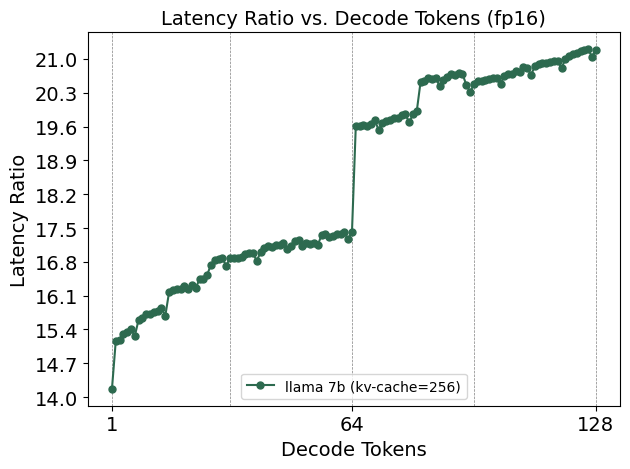

In [74]:
dtype = "fp16"

title = f'Latency Ratio vs. Decode Tokens ({dtype})'
filename = f'llm_tpot_{dtype}.png'

x_vals = [np.load(f'speedtest/llm_prev_256.npy')]
y_vals = ['llama 7b (kv-cache=256)']
colors = ['#2d6a4f', '#52b788', '#95d5b2', '#b7e4c7', '#d8f3dc']
labels =  [f"LLM (kv_cache=256)"]

plot_latency(x_vals, y_vals, labels, title, colors, filename)

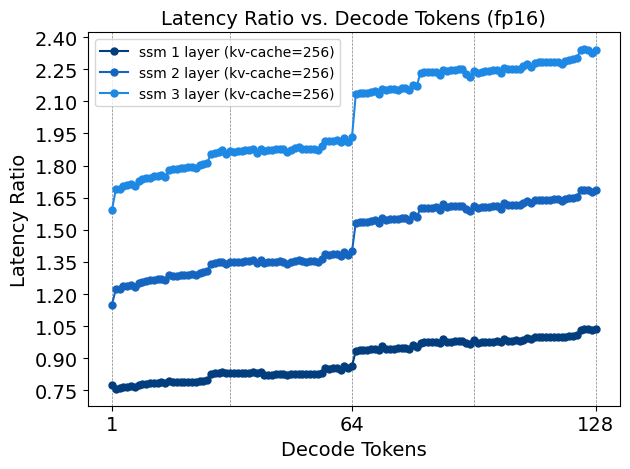

In [4]:
dtype = "fp16"

title = f'Latency Ratio vs. Decode Tokens ({dtype})'
filename = f'ssm_tpot_{dtype}.png'

x_vals = [np.load(f'speedtest/ssm_1layer_prev_256.npy'), np.load(f'speedtest/ssm_2layer_prev_256.npy'), np.load(f'speedtest/ssm_3layer_prev_256.npy')]
y_vals = ['ssm 1 layer (kv-cache=256)', 'ssm 2 layer (kv-cache=256)', 'ssm 3 layer (kv-cache=256)']
colors = ['#023e7d', '#1565c0', '#1e88e5', '#42a5f5', '#90caf9', '#bbdefb']
labels =  [f"SSM (kv_cache=256)"]

plot_latency(x_vals, y_vals, labels, title, colors, filename)